In [192]:
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# conda activate is2022

# copy listening test results to ilcc cluster

```bash
rsync -avu /Users/jonojace/Downloads/SSW2023\ -\ Experiment\ 1_April\ 5,\ 2023_09.09.tsv s1785140@escience6.inf.ed.ac.uk:/home/s1785140/rlspeller/ab_test/
```

# import tsv results as dataframe


In [193]:
with open('SSW2023 - Experiment 1_April 5, 2023_09.09.tsv',encoding='UTF-16') as f:
    df = pd.read_table(f)

In [194]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'Q6.91', 'Q6.92', 'Q6.93', 'Q6.94', 'Q6.95', 'Q6.96', 'Q6.97', 'Q6.98',
       'Q6.99', 'Q6.100'],
      dtype='object', length=220)

## figure out which columns belong to each test

Q1.1 means block 1 question 1 

but tests start from around block 5 or 6

so Q5.1 is block 5 (test 1), question 1

In [195]:
first_test_block_num = 5
last_test_block_num = 6

block2test = {f"Q{block_num}": 1+i for i, block_num in enumerate(range(first_test_block_num, last_test_block_num+1))}
block2test

{'Q5': 1, 'Q6': 2}

# Aggregate answers from all tests and all questions in each test

In [196]:
"""
aggregated_answers = {
    test1: {
        question1: {
            ans1: count_of_ans1,
            ans2: count_of_ans2,
            ans3: count_of_ans3,
        }, 
        question2: {
            ans1: count_of_ans1,
            ans2: count_of_ans2,
            ans3: count_of_ans3,
        },
        ...
    }
    test2: {
        ...
    }
}
"""
QUESTIONS_PER_BLOCK = 100

aggregated_answers = {}

for block, test_num in block2test.items():
    print("*** processing", block)
    cols = df.columns[df.columns.str.contains('Q5')]
    assert len(cols) == QUESTIONS_PER_BLOCK
    aggregated_answers[f'test{test_num}'] = {}
    for col in cols:
        question_num = int(col.split('.')[1])
        aggregated_answers[f'test{test_num}'][f'question{question_num}'] = {}
        # print(col, question_num)
        
        # get answers

        # to_numeric will cause non numeric rows to get turned into NaN
        ans2count = pd.to_numeric(df[col], errors='coerce', downcast='integer').dropna().astype(int).value_counts().to_dict()
        for ans, count in ans2count.items():
            aggregated_answers[f'test{test_num}'][f'question{question_num}'][ans] = count

*** processing Q5
*** processing Q6


In [197]:
aggregated_answers

{'test1': {'question1': {3: 9, 2: 8, 1: 7},
  'question2': {3: 9, 2: 9, 1: 6},
  'question3': {3: 10, 1: 7, 2: 7},
  'question4': {2: 11, 1: 10, 3: 3},
  'question5': {2: 8, 3: 8, 1: 8},
  'question6': {3: 11, 2: 8, 1: 5},
  'question7': {3: 12, 1: 7, 2: 5},
  'question8': {3: 11, 1: 7, 2: 6},
  'question9': {3: 10, 1: 9, 2: 5},
  'question10': {1: 10, 2: 7, 3: 7},
  'question11': {2: 12, 1: 6, 3: 6},
  'question12': {1: 9, 2: 8, 3: 7},
  'question13': {3: 10, 2: 8, 1: 6},
  'question14': {3: 13, 2: 6, 1: 5},
  'question15': {1: 12, 2: 9, 3: 3},
  'question16': {2: 12, 1: 7, 3: 5},
  'question17': {3: 9, 1: 8, 2: 7},
  'question18': {3: 9, 1: 8, 2: 7},
  'question19': {2: 9, 3: 9, 1: 6},
  'question20': {3: 10, 2: 9, 1: 5},
  'question21': {3: 11, 2: 8, 1: 5},
  'question22': {3: 11, 2: 10, 1: 3},
  'question23': {2: 8, 1: 8, 3: 8},
  'question24': {2: 9, 1: 9, 3: 6},
  'question25': {2: 12, 1: 8, 3: 4},
  'question26': {1: 9, 2: 8, 3: 7},
  'question27': {2: 11, 1: 7, 3: 6},
  'questi

In [198]:
# NUM_ANS = 100 # per subtest 

# POSSIBLE_ANSWERS = [
#     1, # sys1
#     2, # sys2 
#     3, # no preference
# ]
# participants_to_exclude = [
#     "jason fong",
#     "Dan test",
#     "not applicable",
# ]

# def get_aggregated_answers(csv_path):
#     # load data from each test from csvs
#     with open(csv_path) as f:
#         all_lines = f.readlines()

#     # only get the lines referring to specific participants
#     lines = [l for l in all_lines if "anonymous,EN" in l]
    

#     aggregated_answers = defaultdict(Counter) # aggregated over all participants, key is question num, value is dict of answers to answer counts
#     """
#     aggregated_answers = {
#         question1: {
#             ans1: count_of_ans1,
#             ans2: count_of_ans2,
#             ans3: count_of_ans3,
#         }, 
#         question2: {
#             ans1: count_of_ans1,
#             ans2: count_of_ans2,
#             ans3: count_of_ans3,
#         }, 
#         ...
#     }
#     """
    
#     print(f"after filtering found {len(lines)} participants in {csv_path}")
    
#     for line in lines:
#         # get the answers for each participant
#         answers = line.split("anonymous,EN")[-1].split(',')[3:-1] # upto but excluding last element as last question in survey is confirmation of working audio
#         answers = [int(ans) for ans in answers]

#         # assert that we have the correct number of answers and that they have the correct values
#         assert len(answers) == NUM_ANS, len(answers)
#         for ans in answers:
#             assert ans in POSSIBLE_ANSWERS

#         # aggregate the answer for this participant
#         for question_num, ans in enumerate(answers, 1):
#             aggregated_answers[question_num][ans] += 1
            
#     return aggregated_answers

In [199]:
# # create testnum + uttnum -> pair of conditions -> conditions mapping 
# ranges = [ # range of questions related to each condition pair
#     (0,13), # for first condition pair
#     (13,26), # for second condition pair
#     (26,39), # etc.
#     (39,52),
#     (52,65),
#     (65,78),
# ]

# testnum2conditionpairs = { 
#     1: ('A','B','F','C','E','D'), # test num to condition pairs 
#     2: ('B','C','A','D','F','E'), 
#     3: ('C','D','B','E','A','F'),
#     4: ('D','E','C','F','B','A'),
#     5: ('E','F','D','A','C','B'),
#     6: ('F','A','E','B','D','C'),
# }

# letter2conditionpair = {
#     'A': ("sac_grapheme", "vanillatts_grapheme"), # condition pair to system on left and system on right
#     'B': ("sac_speechcode_us", "vanillatts_grapheme"),
#     'C': ("sac_speechcode_us", "sac_grapheme"),
#     'D': ("sac_speechcode_scot", "vanillatts_grapheme"),
#     'E': ("sac_speechcode_scot", "sac_grapheme"),
#     'F': ("sac_speechcode_scot", "sac_speechcode_us"),
# }

In [200]:
import pickle 

# load from disk
with open("exp1_testconfig.pkl", 'rb') as f:
    testconfig = pickle.load(f)

In [201]:
ranges = testconfig['ranges']
ranges

[(0, 10),
 (10, 20),
 (20, 30),
 (30, 40),
 (40, 50),
 (50, 60),
 (60, 70),
 (70, 80),
 (80, 90),
 (90, 100)]

In [202]:
testnum2conditionpairs = testconfig['testnum2letters']
testnum2conditionpairs

{1: ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'),
 2: ('B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A'),
 3: ('C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A', 'B'),
 4: ('D', 'E', 'F', 'G', 'H', 'I', 'J', 'A', 'B', 'C'),
 5: ('E', 'F', 'G', 'H', 'I', 'J', 'A', 'B', 'C', 'D'),
 6: ('F', 'G', 'H', 'I', 'J', 'A', 'B', 'C', 'D', 'E'),
 7: ('G', 'H', 'I', 'J', 'A', 'B', 'C', 'D', 'E', 'F'),
 8: ('H', 'I', 'J', 'A', 'B', 'C', 'D', 'E', 'F', 'G'),
 9: ('I', 'J', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'),
 10: ('J', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I')}

In [203]:
letter2conditionpair = testconfig['letter2systempair']
letter2conditionpair = {letter: (sys_dict['sys1'], sys_dict['sys2']) for letter, sys_dict in letter2conditionpair.items()}
letter2conditionpair

{'A': ('hubert-discrete-centroid==Distance(Cosine)',
  'hubert-discrete-code==Distance(Levenshtein)'),
 'B': ('hubert-discrete-centroid==Distance(Cosine)',
  'hubert-raw==Distance(Cosine)'),
 'C': ('hubert-discrete-centroid==Distance(Cosine)',
  'hubert-soft==Distance(Cosine)'),
 'D': ('hubert-discrete-centroid==Distance(Cosine)',
  'mfcc==Distance(Euclidean)'),
 'E': ('hubert-discrete-code==Distance(Levenshtein)',
  'hubert-raw==Distance(Cosine)'),
 'F': ('hubert-discrete-code==Distance(Levenshtein)',
  'hubert-soft==Distance(Cosine)'),
 'G': ('hubert-discrete-code==Distance(Levenshtein)',
  'mfcc==Distance(Euclidean)'),
 'H': ('hubert-raw==Distance(Cosine)', 'hubert-soft==Distance(Cosine)'),
 'I': ('hubert-raw==Distance(Cosine)', 'mfcc==Distance(Euclidean)'),
 'J': ('hubert-soft==Distance(Cosine)', 'mfcc==Distance(Euclidean)')}

In [204]:
conditions = set()
for cond1, cond2 in letter2conditionpair.values():
    conditions.add(cond1)
    conditions.add(cond2)
conditions = list(conditions)

In [205]:
def get_conditions(test_num, utt_num):
    # get the condition pair
    for condition_pair_idx, (range_start, range_end) in enumerate(ranges):
        conditionpairs = testnum2conditionpairs[test_num]
        assert len(ranges) == len(conditionpairs)
        if range_start < utt_num <= range_end:
            condition_pair = conditionpairs[condition_pair_idx]
            break
    else:
        raise ValueError("utt_num not in any range!!!")

    # get the conditions from the condition pair
    cond1, cond2 = letter2conditionpair[condition_pair]
    # print("test_num", test_num, "utt_num", utt_num, "condition_pair", condition_pair,"cond1", cond1, "cond2", cond2)
    
    return cond1, cond2

In [206]:
testnum2conditionpairs

{1: ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'),
 2: ('B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A'),
 3: ('C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A', 'B'),
 4: ('D', 'E', 'F', 'G', 'H', 'I', 'J', 'A', 'B', 'C'),
 5: ('E', 'F', 'G', 'H', 'I', 'J', 'A', 'B', 'C', 'D'),
 6: ('F', 'G', 'H', 'I', 'J', 'A', 'B', 'C', 'D', 'E'),
 7: ('G', 'H', 'I', 'J', 'A', 'B', 'C', 'D', 'E', 'F'),
 8: ('H', 'I', 'J', 'A', 'B', 'C', 'D', 'E', 'F', 'G'),
 9: ('I', 'J', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'),
 10: ('J', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I')}

In [207]:
def get_conditionpair2wincounts(aggregated_answers, # for a single test
                                test_num):
    
    

    conditionpair2wincounts = Counter()
    """
    conditionpair2wincounts = {
        (cond1,cond2): 5, # cond1 beats cond2 5 times
        (cond2,cond1): 50 # cond2 beats cond1 50 times
    }

    NB ties/draws give 0.5 of a win to both conditions
    """
    
    conditionpair2numwins_and_numdraws = defaultdict(Counter)
    """
    conditionpair2numwins_and_numdraws = {
        (cond1,cond2): {
            wins: 20
            draws: 12
        },
        (cond2,cond1): {
            wins: 5
            draws: 4
        } 
        ...
    }
    """
    

    # add wins to systems based on aggregated_answers and the pair of conditions
    for question, answer2counts in aggregated_answers.items():
        question_num = int(question.split('question')[1])
        
        cond1, cond2 = get_conditions(test_num, question_num)
        if 1 in answer2counts: # cond1 won
            conditionpair2wincounts[(cond1, cond2)] += answer2counts[1]
            conditionpair2numwins_and_numdraws[(cond1, cond2)]['wins'] += answer2counts[1]
        if 2 in answer2counts: # cond2 won
            conditionpair2wincounts[(cond2, cond1)] += answer2counts[2]
            conditionpair2numwins_and_numdraws[(cond2, cond1)]['wins'] += answer2counts[2]
        if 3 in answer2counts: # cond1 and 2 drew
            conditionpair2wincounts[(cond1, cond2)] += 0.5 * answer2counts[3]
            # print("conditionpair2wincounts[(cond1, cond2)]", conditionpair2wincounts[(cond1, cond2)])
            conditionpair2wincounts[(cond2, cond1)] += 0.5 * answer2counts[3]
            conditionpair2numwins_and_numdraws[(cond1, cond2)]['draws'] += answer2counts[3]
            conditionpair2numwins_and_numdraws[(cond2, cond1)]['draws'] += answer2counts[3]

    return conditionpair2wincounts, conditionpair2numwins_and_numdraws

In [208]:
# use testnum + uttnum -> pair of conditions -> conditions mapping 
# to assemble counts of how many times one condition beats another condition

alltests_conditionpair2wincounts = Counter()
alltests_conditionpair2numwins_and_numdraws = defaultdict(Counter)

for test, questions in aggregated_answers.items():
    test_num = int(test.split('test')[1])
    conditionpair2wincounts, conditionpair2numwins_and_numdraws = get_conditionpair2wincounts(questions, test_num)
    for conditionpair, wincount in conditionpair2wincounts.items():
        alltests_conditionpair2wincounts[conditionpair] += wincount
        
    for conditionpair,numwins_and_numdraws in conditionpair2numwins_and_numdraws.items():
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['wins'] += numwins_and_numdraws['wins']
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['draws'] += numwins_and_numdraws['draws']



In [209]:
alltests_conditionpair2numwins_and_numdraws

defaultdict(collections.Counter,
            {('hubert-discrete-centroid==Distance(Cosine)',
              'hubert-discrete-code==Distance(Levenshtein)'): Counter({'wins': 162,
                      'draws': 153}),
             ('hubert-discrete-code==Distance(Levenshtein)',
              'hubert-discrete-centroid==Distance(Cosine)'): Counter({'wins': 165,
                      'draws': 153}),
             ('hubert-discrete-centroid==Distance(Cosine)',
              'hubert-raw==Distance(Cosine)'): Counter({'wins': 148,
                      'draws': 171}),
             ('hubert-raw==Distance(Cosine)',
              'hubert-discrete-centroid==Distance(Cosine)'): Counter({'wins': 161,
                      'draws': 171}),
             ('hubert-discrete-centroid==Distance(Cosine)',
              'hubert-soft==Distance(Cosine)'): Counter({'wins': 144,
                      'draws': 158}),
             ('hubert-soft==Distance(Cosine)',
              'hubert-discrete-centroid==Distance(Cosi

In [210]:
# visualise this counts matrix
alltests_conditionpair2wincounts

Counter({('hubert-discrete-centroid==Distance(Cosine)',
          'hubert-discrete-code==Distance(Levenshtein)'): 238.5,
         ('hubert-discrete-code==Distance(Levenshtein)',
          'hubert-discrete-centroid==Distance(Cosine)'): 241.5,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'hubert-raw==Distance(Cosine)'): 233.5,
         ('hubert-raw==Distance(Cosine)',
          'hubert-discrete-centroid==Distance(Cosine)'): 246.5,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'hubert-soft==Distance(Cosine)'): 223.0,
         ('hubert-soft==Distance(Cosine)',
          'hubert-discrete-centroid==Distance(Cosine)'): 257.0,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'mfcc==Distance(Euclidean)'): 229.0,
         ('mfcc==Distance(Euclidean)',
          'hubert-discrete-centroid==Distance(Cosine)'): 251.0,
         ('hubert-discrete-code==Distance(Levenshtein)',
          'hubert-raw==Distance(Cosine)'): 244.0,
         ('hubert-r

In [211]:
conditions

['hubert-raw==Distance(Cosine)',
 'hubert-soft==Distance(Cosine)',
 'hubert-discrete-centroid==Distance(Cosine)',
 'hubert-discrete-code==Distance(Levenshtein)',
 'mfcc==Distance(Euclidean)']

In [212]:
def get_counts_matrix(conditionpair2wincounts, conditions):
    num_conditions = len(conditions)
    
    # save counts matrix in format ready for R and bradley terry analysis (perfmod version of BTL)
    c = np.zeros((num_conditions,num_conditions), dtype=float)

    # description from https://github.com/EllaKaye/BradleyTerryScalable
    # A matrix (either a base matrix or a class from the Matrix package), dimension K by K, 
    # where K is the number of items. The i, j-th element is wi**j, the number of times item i has beaten item j. 
    # Ties can be accounted for by assigning half a win (i.e. 0.5) to each item.
    
    cond2matrix_idx = {
        condition: i for i, condition in enumerate(conditions)
    }
    
    for (cond1, cond2), count in conditionpair2wincounts.items():
        i, j = cond2matrix_idx[cond1], cond2matrix_idx[cond2]
        c[i][j] = count
    
    return c

In [213]:
c = get_counts_matrix(alltests_conditionpair2wincounts, conditions)
c

array([[  0. , 235. , 246.5, 236. , 247.5],
       [245. ,   0. , 257. , 231. , 247.5],
       [233.5, 223. ,   0. , 238.5, 229. ],
       [244. , 249. , 241.5,   0. , 241. ],
       [232.5, 232.5, 251. , 239. ,   0. ]])

In [214]:
# create a pandas dataframe so we can label rows and columns
column_names = conditions
row_names = column_names.copy()
df = pd.DataFrame(c, columns=column_names, index=row_names)

In [215]:
df

,hubert-raw==Distance(Cosine),hubert-soft==Distance(Cosine),hubert-discrete-centroid==Distance(Cosine),hubert-discrete-code==Distance(Levenshtein),mfcc==Distance(Euclidean)
hubert-raw==Distance(Cosine),0.0,235.0,246.5,236.0,247.5
hubert-soft==Distance(Cosine),245.0,0.0,257.0,231.0,247.5
hubert-discrete-centroid==Distance(Cosine),233.5,223.0,0.0,238.5,229.0
hubert-discrete-code==Distance(Levenshtein),244.0,249.0,241.5,0.0,241.0
mfcc==Distance(Euclidean),232.5,232.5,251.0,239.0,0.0


In [216]:
# total wins for each condition 
# add col that sums the wins for each condition / row 
df.sum(axis=1)

hubert-raw==Distance(Cosine)                   965.0
hubert-soft==Distance(Cosine)                  980.5
hubert-discrete-centroid==Distance(Cosine)     924.0
hubert-discrete-code==Distance(Levenshtein)    975.5
mfcc==Distance(Euclidean)                      955.0
dtype: float64

In [217]:
# total losses for each condition
df.sum(axis=0)

hubert-raw==Distance(Cosine)                   955.0
hubert-soft==Distance(Cosine)                  939.5
hubert-discrete-centroid==Distance(Cosine)     996.0
hubert-discrete-code==Distance(Levenshtein)    944.5
mfcc==Distance(Euclidean)                      965.0
dtype: float64

# Use python package choix to get bradley terry estimates of quality for our conditions

In [218]:
from choix import lsr_pairwise_dense, ilsr_pairwise_dense #non iterative and iterative versions
import matplotlib.pyplot as plt

In [219]:
def counts_matrix_to_bradley_terry_plot(c, savepath=""):
    islr_res = ilsr_pairwise_dense(c).tolist()

    # list(zip(islr_res, column_names)) # unsorted
    # # sort cols by result value to make legend easier to read
    # sorted(zip(islr_res, column_names), reverse=True)

    fig, ax = plt.subplots()
    # ax.scatter(x=islr_res, y=np.array([0,0,0,0]))
    markers = ['^', 'o','X', 's', 'h']
    colours = ['#6dda9d', '#e96860', '#7ea9e5', '#e46af0', '#FFA533']
    assert len(conditions) == len(markers) == len(colours)
    for (x_val, label), marker, colour in zip(zip(islr_res, column_names), markers, colours):
    # for (x_val, label), marker, colour in zip(sorted(zip(islr_res, column_names), reverse=False), markers, colours):
        ax.scatter(x=x_val, y=[0.125], marker=marker, label=label, s=125, c=colour)

    ax.set_aspect(2)
    ax.grid(True, which='both', axis="x")

    #############################################
    # set the x-spine (see below for more info on `set_position`)
    # ax.spines['left'].set_position('zero')
    # turn off the right spine/ticks

    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    # ax.yaxis.tick_left()

    #############################################
    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    #############################################
    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

    ax.set_yticks([])

    #############################################
    # limits
    plt.xlim([-1, 1.01])
    plt.ylim([0, 0.25])

    ax.axvline(x=0.0035, color='k')
    ax.axhline(y=-0, color='k')

    legend = ax.legend(
        # loc="upper left", 
        bbox_to_anchor =(-0.03, 1.05),
    )

    legend.set_title("Conditions:")
    # legend.set_title(r"$\bf{Conditions}$")
                     # prop = {'size':15})
    legend._legend_box.align = "left"

    ax.set_xlabel("Condition Score")
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')

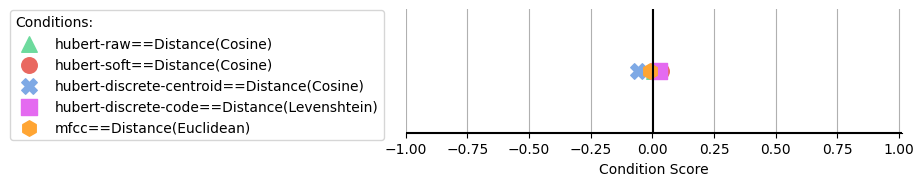

In [220]:
counts_matrix_to_bradley_terry_plot(c, savepath='plots/results.pdf')

# do significance tests for each pair of conditions using the counts matrix

## two sample z-test for proportions using python 
https://vitalflux.com/two-sample-z-test-for-proportions-formula-examples/#:~:text=Summary-,What%20is%20two%20proportion%20Z%2Dtest%3F,the%20two%20proportions%20are%20equal.

In [226]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [227]:
from statsmodels.stats.proportion import proportions_ztest

# stop execution

In [224]:
raise ValueError("finish here!")

ValueError: finish here!

# analyse the speakers that are occur in each speech codes conditions SAC-us and SAC-scot

In [223]:
# load url lists
with open('url_lists/SAC-speechcode-input-us-fem.txt') as f:
    urls = f.readlines()

speakers = [url.split('-')[-1].split('_')[0] for url in urls]

len(set(speakers))

FileNotFoundError: [Errno 2] No such file or directory: 'url_lists/SAC-speechcode-input-us-fem.txt'

In [ ]:
Counter(speakers)

In [ ]:
sum(Counter(speakers).values()) / len(set(speakers))

In [ ]:
# load url lists
with open('url_lists/SAC-speechcode-input-scot-fem.txt') as f:
    urls = f.readlines()

speakers = [url.split('-')[-1].split('_')[0] for url in urls]

len(set(speakers))

In [ ]:
Counter(speakers)

In [ ]:
sum(Counter(speakers).values()) / len(set(speakers))

# for paper writeup
# find the words that are most preferred as US speech codes compare to Scottish speech codes

In [ ]:
all_words = []

for test_num, path in enumerate(paths,1):

    agg_ans = get_aggregated_answers(path)

    with open(f"url_lists_ab/ab-urls-test{test_num}_targetwords.txt") as f:
        lines = f.readlines()

    words = [line.rstrip().split()[-1] for line in lines]

    conditions = []
    for utt_num in range(1,79):
        cond1, cond2 = get_conditions(test_num, utt_num)
        conditions.append((cond1,cond2))
        # word = words[utt_num-1]

    for i, (condition, word) in enumerate(zip(conditions, words), 1):
        if condition == ('sac_speechcode_scot', 'sac_speechcode_us') or condition == ('sac_speechcode_us', 'sac_speechcode_scot'):
            counter = agg_ans[i]
            assert sum(counter.values()) == NUM_PARTICIPANTS_PER_TEST
            # print(i, condition, word, counter)
            all_words.append((i, condition, word, counter))

all_words = sorted(all_words, key=lambda x: x[0])
            
for x in all_words:
    print(x)

In [ ]:
# sort by times us speech codes win most
# 2 is us speech codes
h_barchart_data = []
num_wins2count = Counter()
# sort_fn = lambda x:x[3][2] * 100 + x[3][3] #sort by us then by no preference
sort_fn = lambda x:(x[3][2] / (x[3][1]+1)) #sort by us / scot ratio (+1 to stop division by 0 error)
for i, condition, word, counter in sorted(all_words, key=sort_fn, reverse=True): # lambda x:x[3][2] * 100 + x[3][3] because we want to rank first by 2 (us wins) then by 3 (no preference)
    h_barchart_data.append(counter)
    print(i, word, counter)
    num_wins = counter[2] # 2 is us speech codes
    num_wins2count[num_wins] += 1

us_wins_counts = sorted(num_wins2count.items(), key=lambda x: x[0], reverse=True)
    
print(us_wins_counts)

In [ ]:
# sort by times scot speech codes win most (1 is scottish speech codes)
num_wins2count = Counter()
h_barchart_data_scot = []
sort_fn = lambda x:x[3][1] * 100 + x[3][3] #sort by scot then by no preference
for i, condition, word, counter in sorted(all_words, key=sort_fn, reverse=True):
    h_barchart_data_scot.append(counter)
    print(i, word, counter)
    num_wins = counter[1] # 1 is scot speech codes
    num_wins2count[num_wins] += 1
    
scot_wins_counts = sorted(num_wins2count.items(), key=lambda x: x[0], reverse=True)
    
print(scot_wins_counts)

# make plot comparing times SAC us wins vs SAC scot

In [ ]:
us_wins_counts

In [ ]:
scot_wins_counts

In [ ]:
x,y = zip(*us_wins_counts)

In [ ]:
x

In [ ]:
y

In [ ]:
len(y)

In [ ]:
sum(y[:7])

In [ ]:
us_wins_counts
x,y = zip(*us_wins_counts)
plt.plot(x,y, label="US")
x,y = zip(*scot_wins_counts)
plt.plot(x,y, label="SCOT")
plt.legend()

In [ ]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(i, colname, labels)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # turn off y axis labels
    ax.axes.yaxis.set_visible(False)

    return fig, ax


survey(results, category_names)
plt.show()

In [ ]:
def get_barwidths_from_counter(counter):
    # US
    if 2 in counter: 
        left = counter[2]
    else:
        left = 0
    # no pref
    if 3 in counter: 
        middle = counter[3]
    else:
        middle = 0
    # Scot
    if 1 in counter: 
        right = counter[1]
    else:
        right = 0
    return [left, middle, right]

In [ ]:
def get_barwidths_from_counter_scot(counter):
    # US
    if 1 in counter: 
        left = counter[1]
    else:
        left = 0
    # no pref
    if 3 in counter: 
        middle = counter[3]
    else:
        middle = 0
    # Scot
    if 2 in counter: 
        right = counter[2]
    else:
        right = 0
    return [left, middle, right]

In [ ]:
h_barchart_data

In [ ]:
category_names = ['us', 'no pref', 'scot']

results = {f'Question {i}': get_barwidths_from_counter(counter) for i, counter in enumerate(h_barchart_data,1)}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(i, colname, labels)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # turn off y axis labels
    ax.axes.yaxis.set_visible(False)

    return fig, ax


survey(results, category_names)
plt.show()

In [ ]:
category_names = ['scot', 'no pref', 'us']

results = {f'Question {i}': get_barwidths_from_counter_scot(counter) for i, counter in enumerate(h_barchart_data_scot,1)}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(i, colname, labels)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # turn off y axis labels
    ax.axes.yaxis.set_visible(False)

    return fig, ax


survey(results, category_names)
plt.show()